# Modelo de Aplicação de Validação Cruzada com Naive Bayes

## Fases:<br>
1 - Formulação do problema e preparo dos dados.<br>
2 - Limpeza e normalização dos dados.<br>
3 - Análise exploratória, Estatística Descritiva, PCA.<br>
4 - Aprendizado supervisionado através da validação cruzada (conjunto de teste).<br>
5 - Treinamento do modelo com todos os dados.<br>
6 - Avaliação do modelo.<br>
7 - Interpretação dos resultados.

_____________________________________________________________________________________________________________________

## Formulação do problema e leitura dos dados
-- Vamos considerar o problema de classificar modelos cardíacos tridimensionais para identificação da presença ou não de cardiomiopatia.

--Vamos considerar a base de dados: CMCT_20200503.csv.
--Esta base já está com seus dados verificados.

--Aplicado as seguintyes transformação:
- sexo: 0 (Feminino) / 1 (Masculino)
- classes: 0 (Normal) / 1 (Dilatado) / 2 (Hipertrófico)

--Para este exercício estaremos considerando somentes as amostras dos casos Normais e Hipertróficos, pois assim
teremos somentes duas classes e com amostras balanceadas.

#### Atributos:<br>


## 1) Leitura da base

In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import random
random.seed(42)

In [2]:
# Leitura da Base
df = pd.read_csv('cmct_20200503.csv', header=(0))

print("Número de linhas e colunas:", df.shape, '\n')
print('\n', df.info(), '\n')

df.head(10)

Número de linhas e colunas: (400, 330) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 330 entries, id to TotalParedeSpharmL10
dtypes: float64(321), int64(8), object(1)
memory usage: 1.0+ MB

 None 



,id,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,id001,29,1,74,110,0,0.0,0.0,21.6,0.0,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,id002,31,1,94,126,0,16.1,0.0,133.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,id003,27,1,92,157,0,33.4,0.0,84.4,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06
3,id004,52,1,106,107,0,0.0,0.0,17.4,0.0,...,-139380.800912,46566.673586,-48469.232119,36230.421882,41169.985242,-1.000896e+03,-79029.758729,-2.013094e+04,-1.488101e+04,-4.085351e+04
4,id005,56,1,68,73,0,2.7,0.0,115.0,0.0,...,-95503.576892,4503.168069,-20060.300707,40453.585284,572.456509,1.549634e+04,13154.569224,1.391572e+04,1.513852e+04,-3.441970e+03
5,id006,35,0,70,103,0,5.4,0.0,24.4,1.8,...,-63198.303428,-12805.441742,-29486.561865,-11511.729818,20135.858118,-2.785770e+03,-18967.938264,-1.288455e+04,-1.016681e+04,-1.081472e+04
6,id007,57,1,154,119,0,0.0,0.0,46.6,0.0,...,-230149.480024,-12580.061902,-40272.866416,121429.369244,89331.211660,3.923950e+04,-86187.757852,1.563185e+05,-1.134728e+04,-1.130754e+05
7,id008,38,1,111,138,0,8.0,0.0,25.7,0.0,...,-166424.044654,113644.348558,44626.643732,-11080.342073,-482.187299,3.050636e+04,21819.126008,6.855889e+03,-6.314791e+01,1.049568e+04
8,id009,31,1,78,109,0,38.2,0.0,30.0,0.0,...,-58023.674157,-322.638438,32146.862644,135122.302758,-344461.371909,1.910496e+05,204202.635234,-8.857179e+05,2.410008e+06,5.062744e+05
9,id010,52,1,69,81,0,0.0,0.0,0.0,0.0,...,-124510.798538,55274.008361,-14274.354498,26012.411830,58025.682239,1.752425e+05,-3624.491239,-2.191007e+05,1.787329e+04,-5.546105e+04


## 2) Limpeza e normalização dos dados
<br><b>Análise inicial:</b></br>
- A base possuí sua primeira coluna como identificador do paciente e que deverá ser excluída.
- Existem 330 colunas que deverão ser avaliadas para uma diminuição de dimensão
- Somente as classes 0 e 2 serão consideradas (exclusão das linhas com TARGET=2)

In [3]:
# Exclusão da coluna 'id'
df = df.drop('id', axis=1)

# Exclusão das linhas com 'TARGET' = 1
print('Dimensão da Base original: ', df.shape)
masc = df['TARGET'] == 1
df = df.drop(list(df[masc].index))
print('\nDimensão da Base após eliminação: ', df.shape)


df.head()

Dimensão da Base original:  (400, 329)

Dimensão da Base após eliminação:  (217, 329)


,idade,sexo,volume,massa,TARGET,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0,0.0,0.0,21.6,0.0,15.9,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,0,16.1,0.0,133.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,0,33.4,0.0,84.4,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06
3,52,1,106,107,0,0.0,0.0,17.4,0.0,0.0,...,-139380.800912,46566.673586,-48469.232119,36230.421882,41169.985242,-1.000896e+03,-79029.758729,-2.013094e+04,-1.488101e+04,-4.085351e+04
4,56,1,68,73,0,2.7,0.0,115.0,0.0,0.0,...,-95503.576892,4503.168069,-20060.300707,40453.585284,572.456509,1.549634e+04,13154.569224,1.391572e+04,1.513852e+04,-3.441970e+03


In [4]:
# Verificação se existem valores nulos (not a number: nan).
df.isnull().sum().sort_values(ascending=False).head(400)

TotalParedeSpharmL10    0
OctEndoL0807            0
OctEndoL0901            0
OctEndoL0902            0
OctEndoL0903            0
OctEndoL0904            0
OctEndoL0905            0
OctEndoL0906            0
OctEndoL0907            0
OctEndoL0908            0
OctEndoL1001            0
OctEndoL1002            0
OctEndoL1003            0
OctEndoL1004            0
OctEndoL1005            0
OctEndoL1006            0
OctEndoL1007            0
OctEndoL1008            0
OctEpiL0001             0
OctEndoL0808            0
OctEndoL0806            0
OctEpiL0504             0
OctEndoL0805            0
OctEndoL0604            0
OctEndoL0605            0
OctEndoL0606            0
OctEndoL0607            0
OctEndoL0608            0
OctEndoL0701            0
OctEndoL0702            0
                       ..
OctParedeL0304          0
OctParedeL0305          0
OctParedeL0306          0
OctParedeL0307          0
OctParedeL0308          0
OctParedeL0401          0
OctParedeL0402          0
OctParedeL04

In [5]:
dfx = df.copy()

dfx.reset_index(inplace=True, drop=True)

# Armazenando as classes
classes = dfx['TARGET'].value_counts()
attributes = list(df.columns)

# Removendo a coluna TARGET
Y = dfx.loc[:, 'TARGET']
dfx = dfx.drop('TARGET', axis=1)

# Guardando a quantidade de linhas e colunas
nrow, ncol = dfx.shape

# Armazenando as colunas
attributes = list(dfx.columns)

# Transformando para numpy
X = dfx.to_numpy()

dfx.head()

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0.0,0.0,21.6,0.0,15.9,0.0,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,33.4,0.0,84.4,0.0,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06
3,52,1,106,107,0.0,0.0,17.4,0.0,0.0,0.0,...,-139380.800912,46566.673586,-48469.232119,36230.421882,41169.985242,-1.000896e+03,-79029.758729,-2.013094e+04,-1.488101e+04,-4.085351e+04
4,56,1,68,73,2.7,0.0,115.0,0.0,0.0,0.0,...,-95503.576892,4503.168069,-20060.300707,40453.585284,572.456509,1.549634e+04,13154.569224,1.391572e+04,1.513852e+04,-3.441970e+03


### Os dados podem ser normalizados, de modo a evitar o efeito da escala dos atributos nos métodos de aprendizado.

In [6]:
# Normalizando
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('\nMedia: ', np.mean(X, axis = 0))
print('\nDesvio Padrao:', np.std(X, axis = 0))

Dados transformados:

Media:  [ 1.30975619e-16  6.54878097e-17 -6.54878097e-17 -1.30975619e-16
 -9.00457384e-17  2.45579287e-17 -2.60927992e-17 -2.86509168e-17
 -9.82317146e-17 -8.18597622e-18 -3.27439049e-17 -4.91158573e-17
 -1.18696655e-16 -3.27439049e-17  2.82927803e-16  3.68368930e-17
  3.27439049e-17  3.27439049e-17  1.96463429e-16 -8.18597622e-18
  7.77667741e-17  2.45579287e-17 -3.68368930e-17  1.22789643e-17
 -1.14603667e-16  1.63719524e-17  2.94695144e-16  8.18597622e-18
  3.27439049e-17  6.54878097e-17 -3.27439049e-16  1.24836137e-16
  1.01301456e-16  3.27439049e-17 -2.04649405e-17 -7.36737860e-17
  3.27439049e-17  6.54878097e-17 -1.63719524e-17 -3.37671519e-17
  8.18597622e-18 -6.54878097e-17  4.91158573e-17  2.45579287e-17
  0.00000000e+00 -9.82317146e-17 -1.80091477e-16  8.18597622e-17
 -8.18597622e-18  2.86509168e-17  8.18597622e-18  8.18597622e-18
  6.13948216e-18  8.18597622e-18  0.00000000e+00  2.04649405e-17
 -1.63719524e-17 -8.18597622e-18  8.18597622e-18 -8.18597622

### Verificar os balanceamentos das classes.

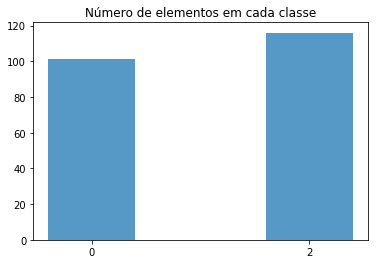

In [7]:
cl = list(classes.index)
ncl = list(classes)
    
plt.bar(cl, ncl,  alpha=.75)
plt.xticks(cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

<br><b>Análise:</b></br>
- O balanceamento mostra pouca diferença entre as classes.

## 3) Análise de correlações
-- Usando o PCA full, isto é, para todas as colunas e em todas dimensões
-- Usando o PCA considerando apenas 2 dimensões principais

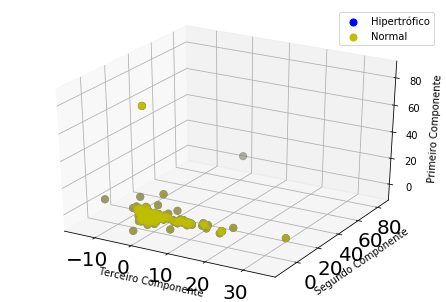

In [8]:

modelPCA = PCA(svd_solver='full')   #(n_components=3)
dfPCA = modelPCA.fit_transform(X)

x = []
y = []
z = []
for ls in dfPCA:
    x.append(ls[0])
    y.append(ls[1])
    z.append(ls[2])

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k', 'w']
aux = 0

fig = plt.figure()
ax = Axes3D(fig)

for c in classes.index:
    if c == 0:
        lb = 'Normal'
    else:
        lb = 'Hipertrófico'
    nodes = np.where(y == c)
    ax.scatter(z, x, y, s=50, color = colors[aux], label = lb)
    aux = aux + 1
    
plt.legend()
ax.set_xlabel('Terceiro Componente')
ax.set_ylabel('Segundo Componente')
ax.set_zlabel('Primeiro Componente')
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Vemos que em duas dimensões, a separação não é clara. Além disso, podemos identificar os atributos que mais explicam a variância nos dados.

<br><b>Primeira Análise do PCA:</b></br>
- Observe que incluímos e terceiro elemento como o primeiro para que o gráfico mostrasse uma possível separação.
Isto porque na ordem natural do PCA por importância, o primeiro elemento não ajudou a distinguir qualquer grupo.

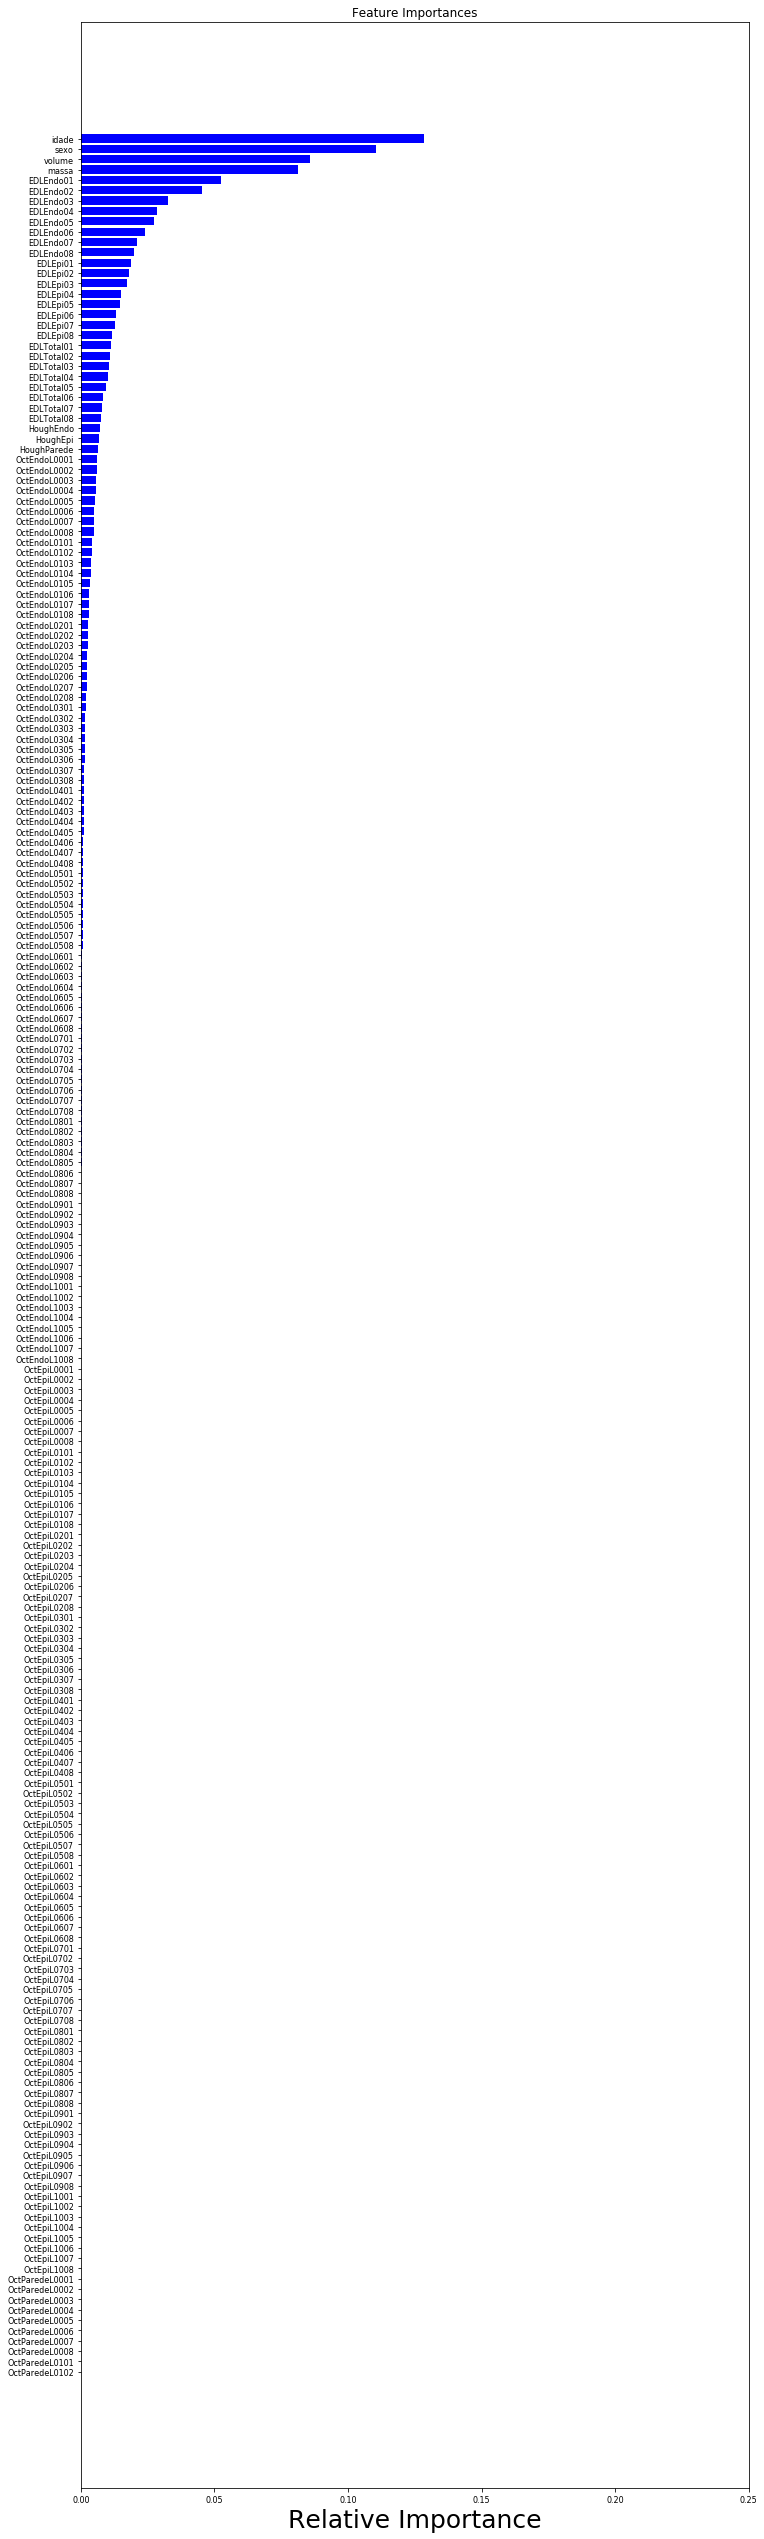

In [9]:
# Verificando a influência dos atributos originais na composição dos elemntos do PCA
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(attributes[i])
    
plt.figure(figsize=(10, 35))
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=8)
plt.yticks(color='k', size=8)
plt.xlim([0.0, 0.25])
plt.show()

Podemos verificar como a variância muda de acordo com o número de componentes. 

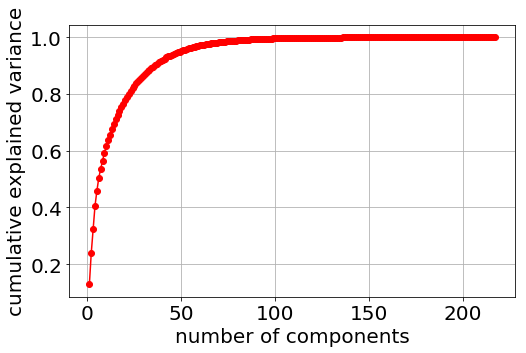

In [10]:
pca = PCA().fit(X)

ncomp = np.arange(1, np.shape(X)[0]+1)

plt.figure(figsize=(8,5))
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

<br><b>Segunda Análise do PCA:</b></br>
- A idade e o sexo tiveram um peso considerável na explicação do modelo.
- Entendemos que, já que se tratando da busca da correlação entre os atributos de medidas e não de idade e sexo,
poderíamos excluir estas colunas.
- Precisamos de muitos componentes para explicar 90% dos dados. Isto pode estar acontecendo porque os dados
não possuem uma correlação muito baixa entre eles. Vamos verificar isto num gráfico de cores (calor).

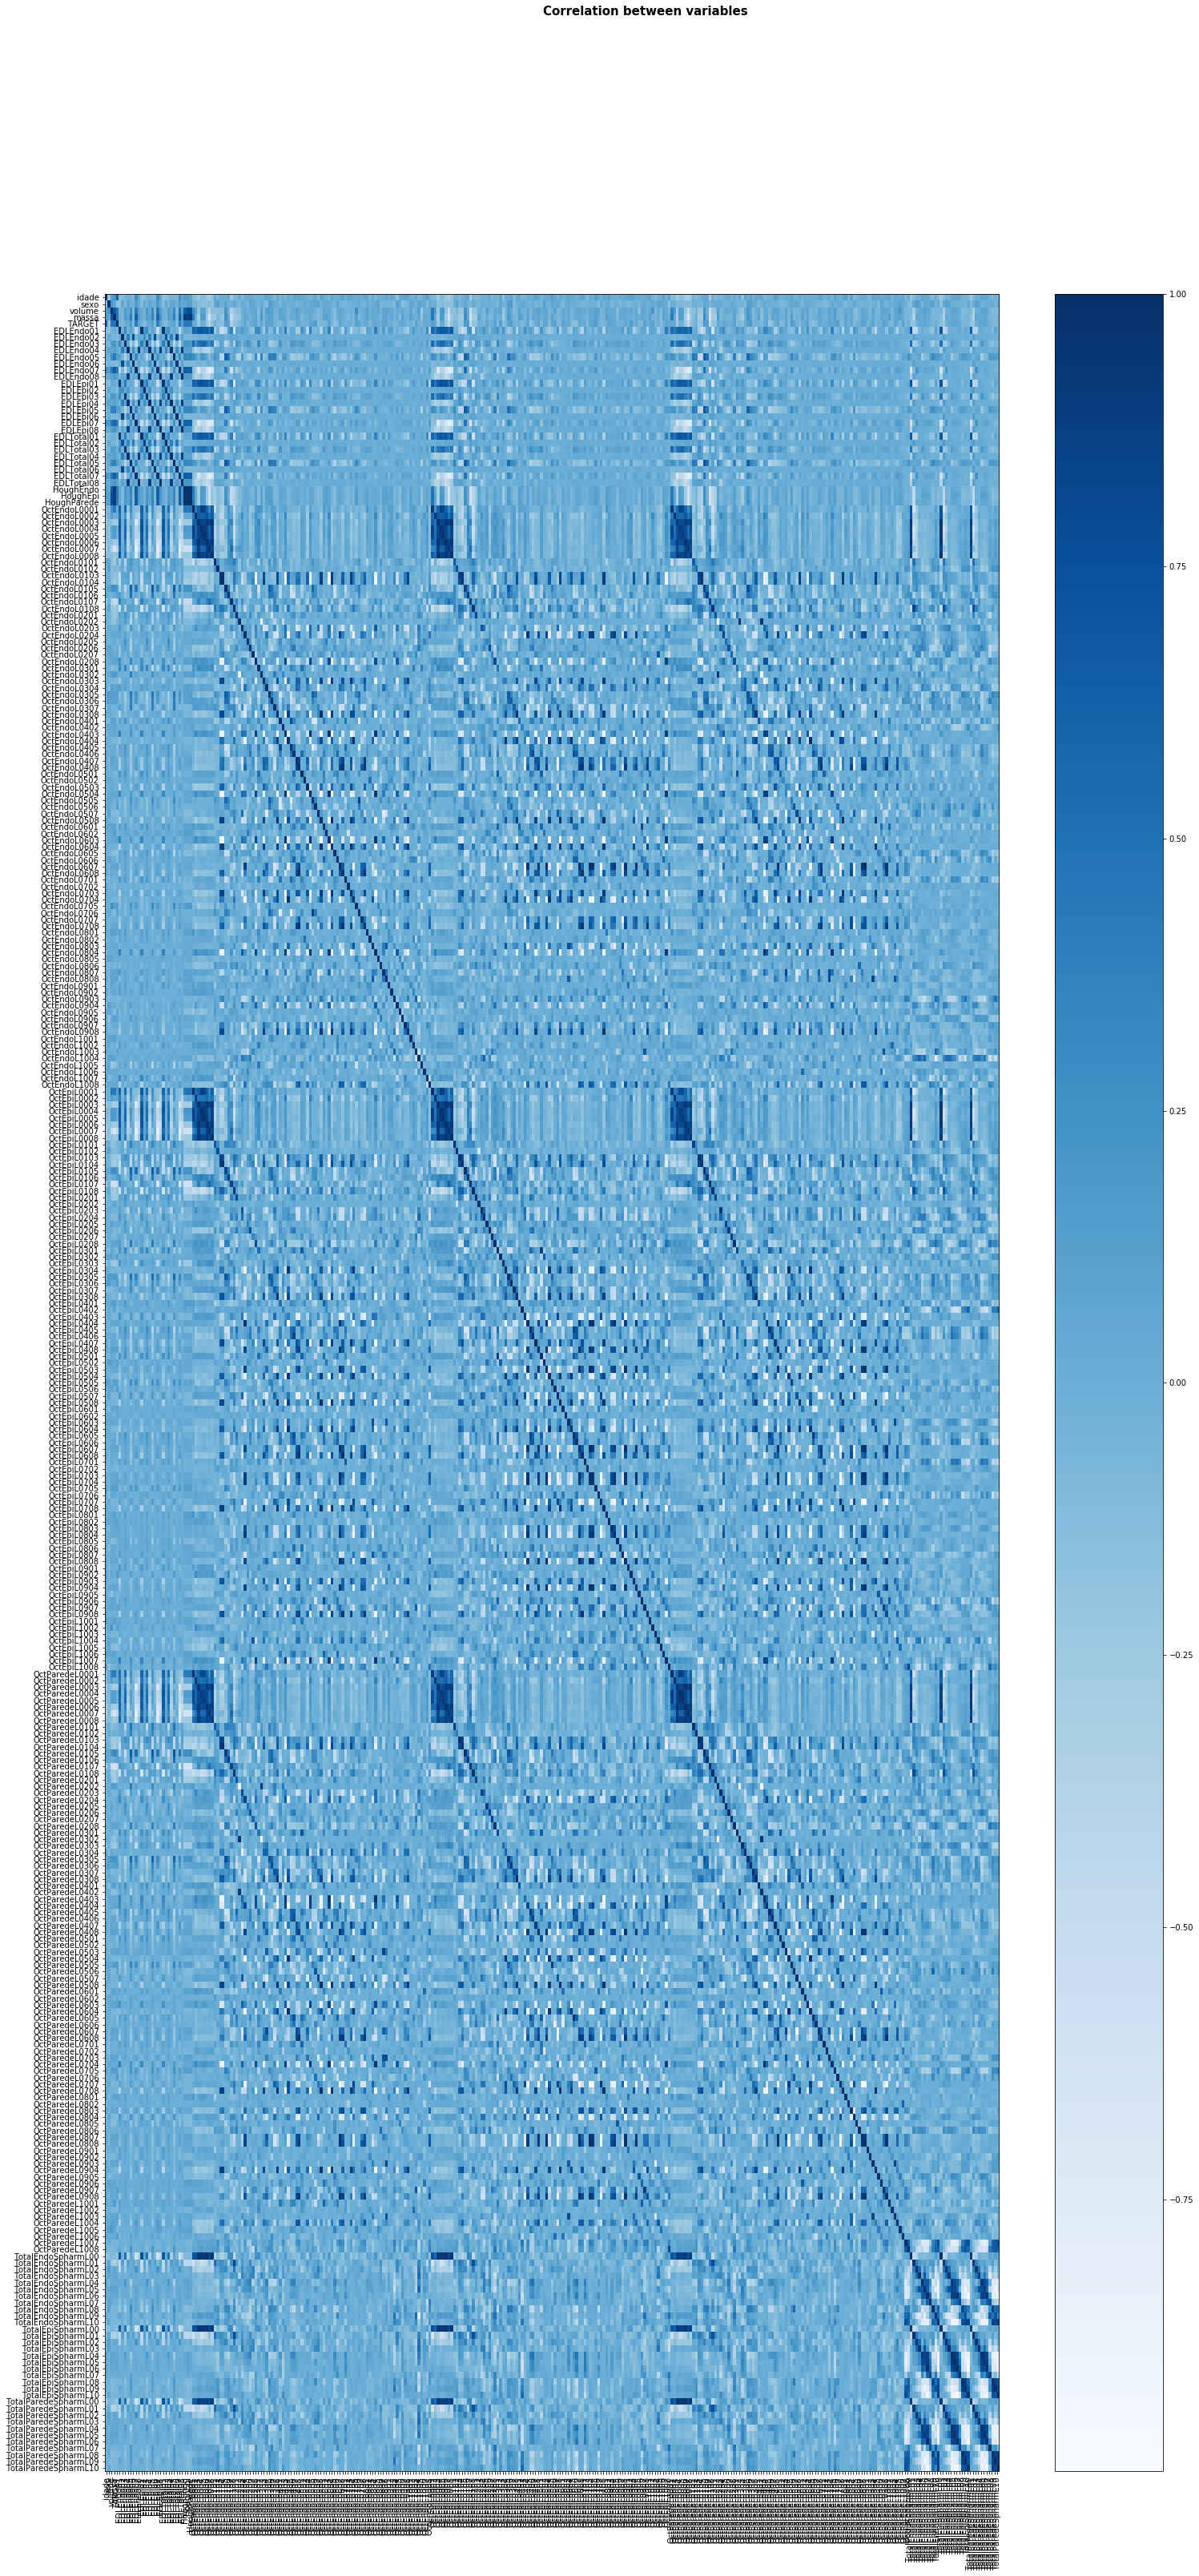

In [11]:
corr = df.corr()

#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(25, 50))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

-Apesar de pouco legível observamos que os atributos não são fortemente correlacionados, com exceção da primeira região, composta pelos 30 primeiros atributos.

- Vamos fazer uma experimentação excluindo as colunas de idade, sexo e as colunas após HoughParede e 
- aplicamos o PCA e fazemos as avaliações.

In [12]:
dfx.head()

,idade,sexo,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,...,TotalParedeSpharmL01,TotalParedeSpharmL02,TotalParedeSpharmL03,TotalParedeSpharmL04,TotalParedeSpharmL05,TotalParedeSpharmL06,TotalParedeSpharmL07,TotalParedeSpharmL08,TotalParedeSpharmL09,TotalParedeSpharmL10
0,29,1,74,110,0.0,0.0,21.6,0.0,15.9,0.0,...,-370009.497215,335894.282142,86542.210472,62266.013014,7802.051260,1.065069e+06,573021.021046,-2.025431e+05,-9.524011e+05,-2.381297e+06
1,31,1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,...,-141806.576054,23698.701494,22189.016025,4403.174271,40612.513318,4.383326e+04,81818.458232,4.615117e+04,4.650854e+04,3.576759e+04
2,27,1,92,157,33.4,0.0,84.4,0.0,0.0,0.0,...,-570967.303337,-705382.958037,-151282.146856,67138.663165,-8005.459046,-4.585848e+05,-741606.061804,-1.107879e+07,3.488353e+06,8.794934e+06
3,52,1,106,107,0.0,0.0,17.4,0.0,0.0,0.0,...,-139380.800912,46566.673586,-48469.232119,36230.421882,41169.985242,-1.000896e+03,-79029.758729,-2.013094e+04,-1.488101e+04,-4.085351e+04
4,56,1,68,73,2.7,0.0,115.0,0.0,0.0,0.0,...,-95503.576892,4503.168069,-20060.300707,40453.585284,572.456509,1.549634e+04,13154.569224,1.391572e+04,1.513852e+04,-3.441970e+03


In [13]:
# Excluindo colunas
# Cópia da base a ser trabalhada
dx = dfx.copy()

# Exclusão da coluna 'sexo'
dx = dx.drop('sexo', axis=1)

# Exclusão da coluna 'idade'
dx = dx.drop('idade', axis=1)

# Considerando apenas as 10 primeiras colunas 
dfx1 = dx.iloc[:, 0:11]

# Guardando a quantidade de linhas e colunas
nrow, ncol = dfx1.shape

# Armazenando as colunas da base alterada
attributes = list(dfx1.columns)

# Transformando para numpy
XX = dfx1.to_numpy()

# Normalizando
scaler = StandardScaler().fit(XX)
XX = scaler.transform(XX)

dfx1.head()

,volume,massa,EDLEndo01,EDLEndo02,EDLEndo03,EDLEndo04,EDLEndo05,EDLEndo06,EDLEndo07,EDLEndo08,EDLEpi01
0,74,110,0.0,0.0,21.6,0.0,15.9,0.0,168.1,0.0,1.7
1,94,126,16.1,0.0,133.0,0.0,0.0,0.0,0.0,0.0,40.0
2,92,157,33.4,0.0,84.4,0.0,0.0,0.0,44.5,0.0,47.9
3,106,107,0.0,0.0,17.4,0.0,0.0,0.0,131.7,0.0,0.0
4,68,73,2.7,0.0,115.0,0.0,0.0,0.0,11.7,0.0,9.2


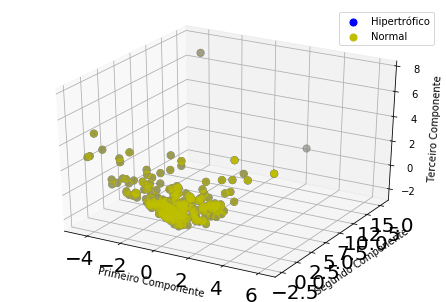

In [14]:
# Aplicando PCA
modelPCA = PCA(svd_solver='full')   #(n_components=3)
dfPCA = modelPCA.fit_transform(XX)

x = []
y = []
z = []
for ls in dfPCA:
    x.append(ls[0])
    y.append(ls[1])
    z.append(ls[2])

colors = ['b', 'y', 'r', 'c', 'm', 'g', 'k', 'w']
aux = 0

fig = plt.figure()
ax = Axes3D(fig)

for c in classes.index:
    if c == 0:
        lb = 'Normal'
    else:
        lb = 'Hipertrófico'
    nodes = np.where(y == c)
    ax.scatter(x, y, z, s=50, color = colors[aux], label = lb)
    aux = aux + 1
    
plt.legend()
ax.set_xlabel('Primeiro Componente')
ax.set_ylabel('Segundo Componente')
ax.set_zlabel('Terceiro Componente')
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

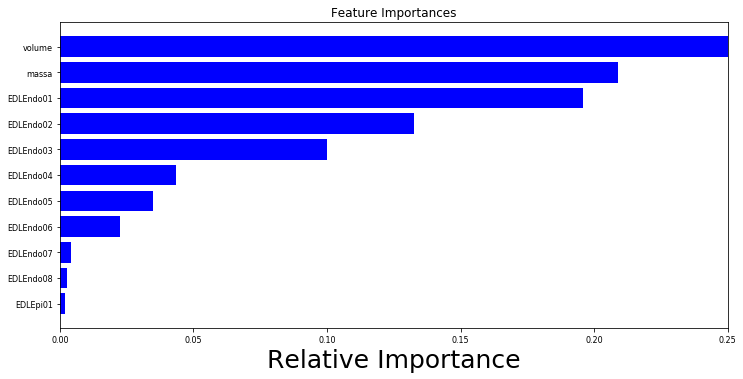

In [15]:
# Verificando a influência dos atributos originais na composição dos elemntos do PCA
pca = PCA()
pca_result = pca.fit_transform(XX)
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []

for i in indices:
    attributes_rank.append(attributes[i])
    
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=8)
plt.yticks(color='k', size=8)
plt.xlim([0.0, 0.25])
plt.show()

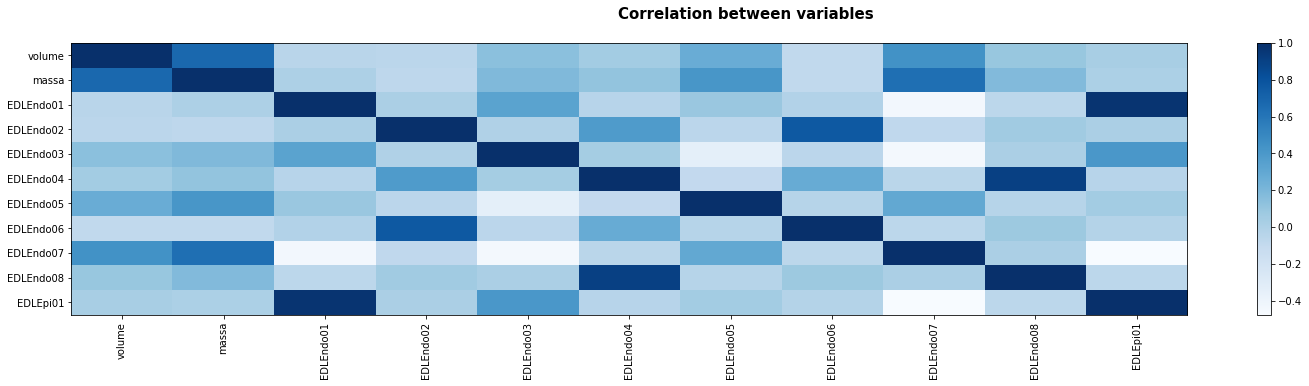

In [16]:
dx = pd.DataFrame(XX, columns=attributes)
corr = dx.corr()

#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(25, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

## 4) Classificação Naive Bayes com Validação Cruzada
Vamos utilizar validação cruzada e aplicar o método de naive bayes.
Para mediar a precisão da classificação, vamos usar a área sobre a curva Roc (AUC).

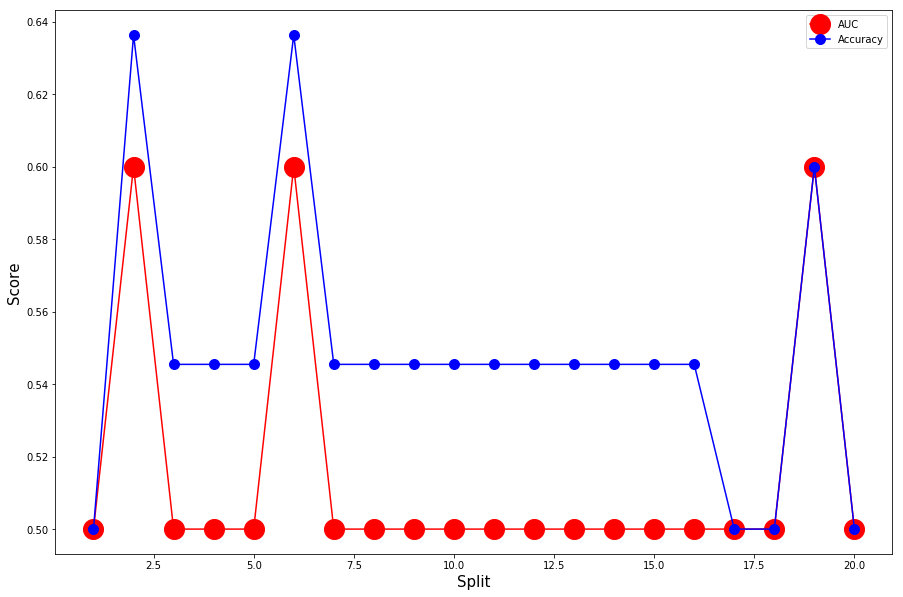

In [27]:
# Gaussian
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=1)

vauc = []
vacc = []

ns = 0
lns = []
for train_index, test_index in cv.split(XX, Y):
    ns +=1
    lns.append(ns)
    
    x_train, x_test = XX[train_index], XX[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
        
    # Treinando e aplicando o modelo NB na base inteira
    modelGNB = GaussianNB()
    modelGNB.fit(x_train, y_train)
    y_pred = modelGNB.predict(x_test)
    score = accuracy_score(y_pred, y_test)

    # Calculando os resultados da curva roc (vauc) e acurácia (vacc)
    vauc.append(roc_auc_score(y_test, y_pred))
    vacc.append(accuracy_score(y_pred, y_test))

# Gráfico de comparação
plt.figure(figsize=(15,10))
plt.plot(lns, vauc, '-ro', label= 'AUC', markersize=20)
plt.plot(lns, vacc, '-bo', label = 'Accuracy', markersize=10)
plt.xlabel('Split', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

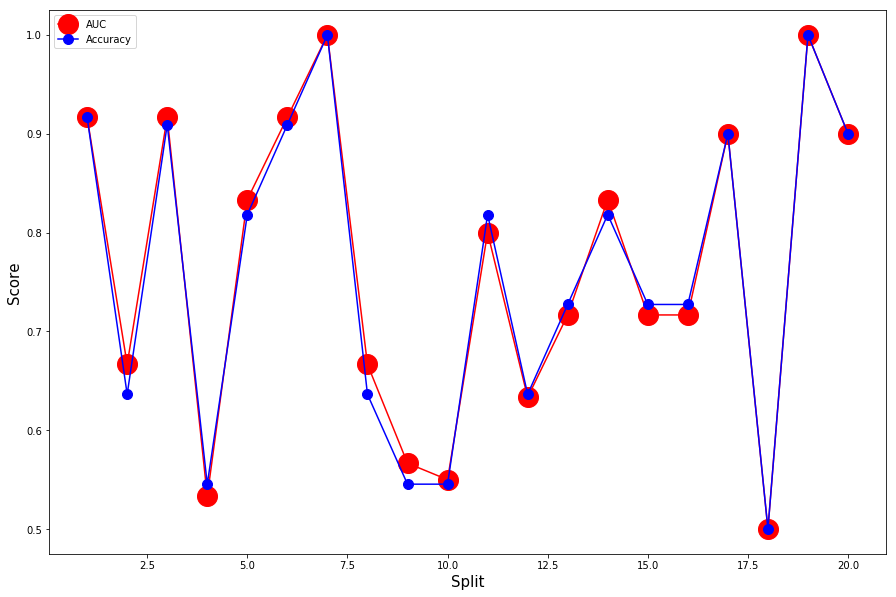

In [28]:
# Bernouilli
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=1)

vauc = []
vacc = []

ns = 0
lns = []
for train_index, test_index in cv.split(XX, Y):
    ns +=1
    lns.append(ns)
    
    x_train, x_test = XX[train_index], XX[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
        
    # Treinando e aplicando o modelo NB na base inteira
    modelBNB = BernoulliNB()
    modelBNB.fit(x_train, y_train)
    y_pred = modelBNB.predict(x_test)
    score = accuracy_score(y_pred, y_test)

    # Calculando os resultados da curva roc (vauc) e acurácia (vacc)
    vauc.append(roc_auc_score(y_test, y_pred))
    vacc.append(accuracy_score(y_pred, y_test))

# Gráfico de comparação
plt.figure(figsize=(15,10))
plt.plot(lns, vauc, '-ro', label= 'AUC', markersize=20)
plt.plot(lns, vacc, '-bo', label = 'Accuracy', markersize=10)
plt.xlabel('Split', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

### 4) testando com o programa montado de K folds

In [29]:
########################################
#### Separa uma base em K conjuntos ####
########################################
def splitFolds(data, target, k=10):
    
    # Contadores para apresentação
    ldata = len(data)              # Quantidade de linhas da base
    numel = int(ldata / k)         # Quantidade de amostras por fold
        
    uclass = target.value_counts() # Classes e suas quantidades
    uclass.sort_index(inplace=True)
    nclass = uclass.index          # Classes
    qclass = uclass.values         # Quantidade de cada classe
    
    # Junção das classes e suas quantidades para um dicionário
    zclass = zip(nclass, qclass)   
    dclass = dict(zclass)          
    
    # Separação dos conjuntos
    partesK = []    # Conterá todos os conjuntos k de índices, cada um proporcional a cada classe
    for i in range(k):
        pk = []
        if (i < 7):
            nelem = numel + 1
        else:
            nelem = numel
            
        ntot = nelem
        
        for nc, qc in dclass.items():
            # Captura de todos os índices da coluna target
            masc = target == nc
            idclass = list(target[masc].index)
        
            # Montagem dos k subgrupos com a mesma proporção da classe
            propclass = int(round(nelem * qc / ldata))
            if (ntot > propclass):
                ntot -= propclass
            else:
                propclass = ntot
            
            rs = random.sample(idclass, propclass)
            pk = pk + rs
            
        partesK.append(pk)
        
    return (partesK)          


In [30]:
k = 10
partesK = splitFolds(X, Y, k)

qtdDS = len(X)
vc = Y.value_counts()
qtdT0 = vc.values[1]
qtdT2 = vc.values[0]
perT0 = round(qtdT0/qtdDS * 100, 2)
perT2 = round(qtdT2/qtdDS * 100, 2)

print('**** Dataset: CMCT_20200503.csv ****')
print('K =', k, '- Dataset:', qtdT0, 'SAN e', qtdT2, 'CMD (', perT0, '%  x ', perT2, '% )')
print()

qtd0 = 0
qtd2 = 0
per0 = 0.0
per2 = 0.0

for f in range(len(partesK)):
    dx = Y[partesK[f]]
    vc = dx.value_counts()
    qtd0 = vc.values[1]
    qtd2 = vc.values[0]
    per0 = round(qtd0/(qtd0 + qtd2) * 100, 2)
    per2 = round(qtd2/(qtd0 + qtd2) * 100, 2)
    
    print(f'Fold {f+1}: SAN: {qtd0}, CMD: {qtd2}, Total: {qtd0+qtd2}, Proporção: {per0}%; {per2}%)')
    



**** Dataset: CMCT_20200503.csv ****
K = 10 - Dataset: 101 SAN e 116 CMD ( 46.54 %  x  53.46 % )

Fold 1: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 2: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 3: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 4: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 5: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 6: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 7: SAN: 10, CMD: 12, Total: 22, Proporção: 45.45%; 54.55%)
Fold 8: SAN: 10, CMD: 11, Total: 21, Proporção: 47.62%; 52.38%)
Fold 9: SAN: 10, CMD: 11, Total: 21, Proporção: 47.62%; 52.38%)
Fold 10: SAN: 10, CMD: 11, Total: 21, Proporção: 47.62%; 52.38%)


In [31]:
partesK

[[81,
  14,
  3,
  94,
  35,
  31,
  28,
  17,
  13,
  86,
  195,
  215,
  170,
  112,
  176,
  155,
  105,
  104,
  128,
  130,
  165,
  178],
 [3,
  71,
  25,
  91,
  83,
  89,
  69,
  53,
  28,
  57,
  176,
  136,
  204,
  212,
  101,
  198,
  121,
  190,
  155,
  144,
  120,
  128],
 [97,
  43,
  13,
  11,
  48,
  12,
  45,
  44,
  77,
  33,
  204,
  106,
  194,
  159,
  169,
  116,
  149,
  111,
  171,
  138,
  207,
  181],
 [79,
  46,
  73,
  24,
  90,
  8,
  5,
  84,
  29,
  98,
  138,
  111,
  210,
  130,
  211,
  113,
  149,
  136,
  159,
  182,
  207,
  147],
 [20,
  47,
  45,
  26,
  85,
  34,
  89,
  87,
  82,
  9,
  178,
  182,
  122,
  169,
  194,
  132,
  121,
  160,
  149,
  135,
  189,
  172],
 [28,
  87,
  41,
  98,
  99,
  7,
  29,
  4,
  40,
  51,
  135,
  109,
  128,
  173,
  213,
  192,
  141,
  184,
  164,
  151,
  214,
  183],
 [58,
  18,
  33,
  17,
  31,
  95,
  71,
  68,
  74,
  54,
  215,
  175,
  152,
  147,
  129,
  118,
  166,
  164,
  112,
  197,
  107,


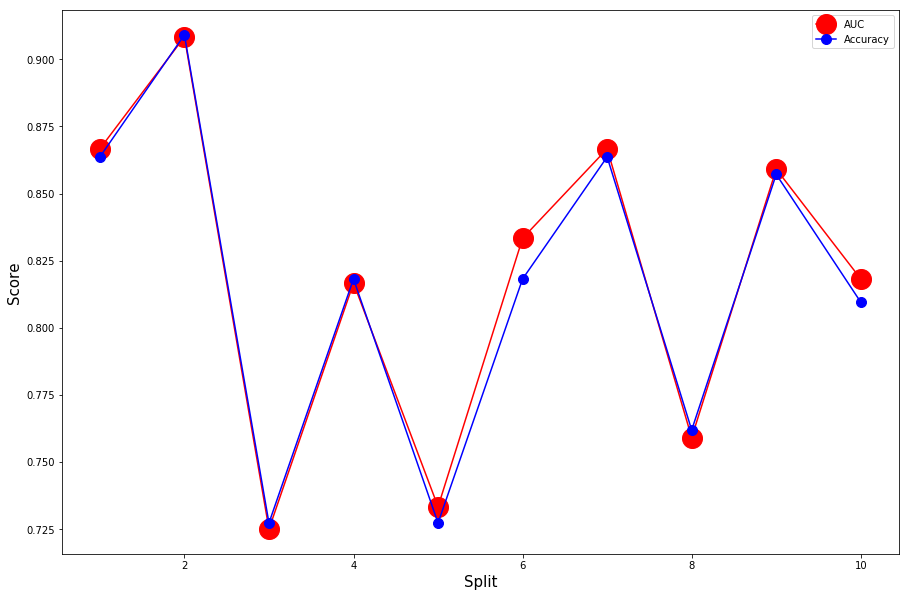

In [32]:
# Bernouilli

vauc = []
vacc = []

ns = 0
lns = []
for ix in partesK:
    ns +=1
    lns.append(ns)
    
    x_train, x_test = XX[ix], XX[ix]
    y_train, y_test = Y[ix], Y[ix]
        
    # Treinando e aplicando o modelo NB na base inteira
    modelBNB = BernoulliNB()
    modelBNB.fit(x_train, y_train)
    y_pred = modelBNB.predict(x_test)
    score = accuracy_score(y_pred, y_test)

    # Calculando os resultados da curva roc (vauc) e acurácia (vacc)
    vauc.append(roc_auc_score(y_test, y_pred))
    vacc.append(accuracy_score(y_pred, y_test))

# Gráfico de comparação
plt.figure(figsize=(15,10))
plt.plot(lns, vauc, '-ro', label= 'AUC', markersize=20)
plt.plot(lns, vacc, '-bo', label = 'Accuracy', markersize=10)
plt.xlabel('Split', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()